In [8]:
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points
import geopandas as gpd

In [2]:
# Origin point
orig = Point(1, 1.67)

# Destination points
dest1 = Point(0, 1.45)
dest2 =Point(2, 2)
dest3 = Point(0, 2.5)

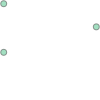

In [4]:
destinations = MultiPoint([dest1, dest2, dest3])
destinations

In [5]:
nearest_geoms = nearest_points(orig, destinations)

In [7]:
print(nearest_geoms[0], nearest_geoms[1])

POINT (1 1.67) POINT (0 1.45)


In [9]:
fp1 = 'L3_data/PKS_suuralue.kml'
fp2 = 'L3_data/addresses.shp'
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
df1 = gpd.read_file(fp1, driver='KML')
df2 = gpd.read_file(fp2)

In [10]:
df1.head()

,Name,Description,geometry
0,Suur-Espoonlahti,,"POLYGON Z ((24.77506 60.10906 0.00000, 24.7766..."
1,Suur-Kauklahti,,"POLYGON Z ((24.61578 60.17257 0.00000, 24.6155..."
2,Vanha-Espoo,,"POLYGON Z ((24.67576 60.21201 0.00000, 24.6752..."
3,Pohjois-Espoo,,"POLYGON Z ((24.76792 60.26920 0.00000, 24.7699..."
4,Suur-Matinkylä,,"POLYGON Z ((24.75361 60.16631 0.00000, 24.7537..."


In [11]:
df2.head()

,address,id,addr,geometry
0,"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...",1000,"Itämerenkatu 14, 00101 Helsinki, Finland",POINT (24.91556 60.16320)
1,"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",1001,"Kampinkuja 1, 00100 Helsinki, Finland",POINT (24.93169 60.16902)
2,"Bangkok9, 8, Kaivokatu, Keskusta, Kluuvi, Etel...",1002,"Kaivokatu 8, 00101 Helsinki, Finland",POINT (24.94168 60.16996)
3,"Hermannin rantatie, Hermanninranta, Hermanni, ...",1003,"Hermannin rantatie 1, 00580 Helsinki, Finland",POINT (24.97684 60.19419)
4,"Hesburger, 9, Tyynenmerenkatu, Jätkäsaari, Län...",1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",POINT (24.92160 60.15665)


In [12]:
df1['centroid'] = df1.centroid
df1.head()

,Name,Description,geometry,centroid
0,Suur-Espoonlahti,,"POLYGON Z ((24.77506 60.10906 0.00000, 24.7766...",POINT (24.76754 60.04409)
1,Suur-Kauklahti,,"POLYGON Z ((24.61578 60.17257 0.00000, 24.6155...",POINT (24.57415 60.19764)
2,Vanha-Espoo,,"POLYGON Z ((24.67576 60.21201 0.00000, 24.6752...",POINT (24.60401 60.25253)
3,Pohjois-Espoo,,"POLYGON Z ((24.76792 60.26920 0.00000, 24.7699...",POINT (24.68683 60.30649)
4,Suur-Matinkylä,,"POLYGON Z ((24.75361 60.16631 0.00000, 24.7537...",POINT (24.76064 60.15018)


In [46]:
def get_nearest_values(row, other_gdf, point_column='geometry', value_column="geometry"):
    """Find the nearest point and return the corresponding value from specified value column."""

    # Create an union of the other GeoDataFrame's geometries:
    other_points = other_gdf["geometry"].unary_union

    # Find the nearest points
    nearest_geoms = nearest_points(row[point_column], other_points)

    # Get corresponding values from the other df
    nearest_data = other_gdf.loc[other_gdf["geometry"] == nearest_geoms[1]]

    nearest_value = nearest_data[value_column].values[0]

    return nearest_value

In [47]:
df1["nearest_loc"] = df1.apply(get_nearest_values, other_gdf=df2, point_column="centroid", value_column="id", axis=1)
df1.head()

,Name,Description,geometry,centroid,nearest_loc
0,Suur-Espoonlahti,,"POLYGON Z ((24.77506 60.10906 0.00000, 24.7766...",POINT (24.76754 60.04409),1000
1,Suur-Kauklahti,,"POLYGON Z ((24.61578 60.17257 0.00000, 24.6155...",POINT (24.57415 60.19764),1020
2,Vanha-Espoo,,"POLYGON Z ((24.67576 60.21201 0.00000, 24.6752...",POINT (24.60401 60.25253),1020
3,Pohjois-Espoo,,"POLYGON Z ((24.76792 60.26920 0.00000, 24.7699...",POINT (24.68683 60.30649),1017
4,Suur-Matinkylä,,"POLYGON Z ((24.75361 60.16631 0.00000, 24.7537...",POINT (24.76064 60.15018),1020
